#Monthly summaries
Generate plots and statistics for all monthly analyses

In [48]:
%matplotlib inline
import glob, pickle
curdir = os.getcwd()
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))
files =  sorted(glob.glob('month*/sources.pickle')); len(files)
monthlist = [f.split('/')[0] for f in files]; monthlist
sourcelists = [pickle.load(open(f)) for f in files]

In [62]:
t = dict()
for month,sm in zip(monthlist, sourcelists):
    t[month]= dict(ntot=len(sm),
                          ntrans=sum(sm.transient &(sm.ts>10)),
               )
monthsdf = pd.DataFrame(t).T
monthsdf.T

,month01,month02,month03,month04,month05,month06,month07,month08,month09,month10,month11,month12
ntot,1602,1855,1717,1675,1715,1821,1884,1741,1909,1896,1834,1951
ntrans,427,483,455,438,410,476,440,461,493,495,444,535


###plots for a given month
use the SourceInfo sub class for access to functions to generate plots

In [100]:
# from uw.like2.analyze import sourceinfo; reload(sourceinfo)
self=sourceinfo.ExtSourceInfo('month01')        

In [102]:
self.df['prefix'] = [n[:2] for n in self.df.index]
self.df['fixed'] = [not x for x in self.df.transient]

In [160]:
hilat = np.abs(self.df.glat)>10
goodloc = self.df.locqual<5

1068


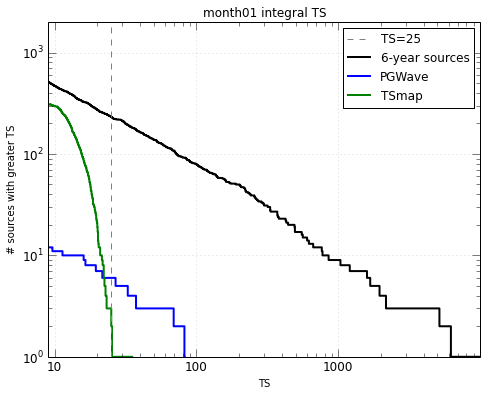

In [161]:
df=self.df[hilat & goodloc]
print len(df)
fig=self.cumulative_ts(check_localized=False, tscut=[],
                  ts = df.ts[df.fixed], label='6-year sources',
                  other_ts=[df.ts[df.prefix=='PG'],
                            df.ts[df.prefix=='Sh']],
                  other_label=['PGWave', 'TSmap']);
plt.setp(fig.axes[0], ylim=(1,2000), title='month01 integral TS');

###Do all months

In [80]:
monthinfo = [sourceinfo.ExtSourceInfo(month) for month in monthlist]

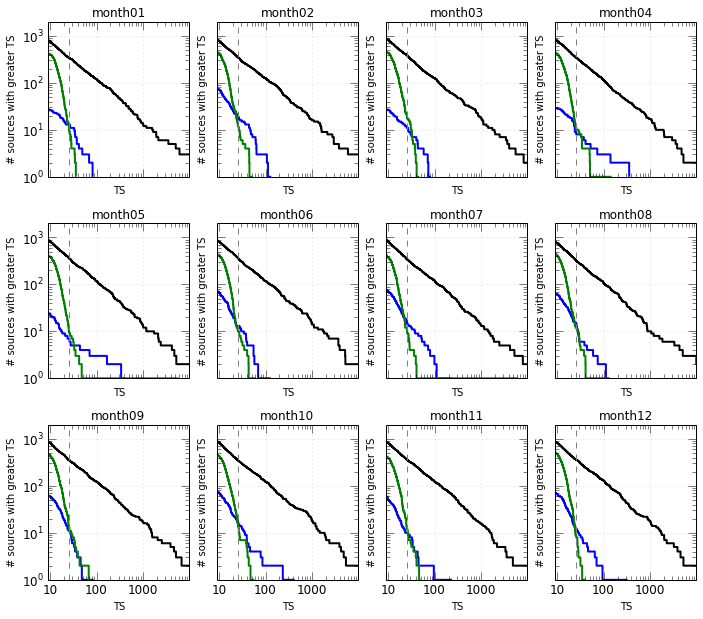

In [99]:
fig, axx = plt.subplots(3,4, sharex=True, sharey=True, figsize=(12,10))
plt.subplots_adjust(hspace=0.3)
for ax, info, month,  in zip(axx.flatten(), monthinfo, monthlist):
    df=info.df
    df['prefix'] = [n[:2] for n in df.index]
    df['fixed'] = [not x for x in df.transient]
    fig=info.cumulative_ts(ax=ax, check_localized=False, tscut=[],
                ts = df.ts[df.fixed], label='6-year sources',
                other_ts=[df.ts[df.prefix=='PG'],
                           df.ts[(df.prefix=='Sh') | (df.prefix=='S ')|(df.prefix=='TS')]] ,
                other_label=['PGWave', 'TSmap'], 
                legend=False,
                );
    plt.setp(ax, title=month, ylim=(1,2000))

##Compare?
Are the apparent new transient sources in the same positions?
Make a combined list to plot with Aladin

In [168]:
dflist= []
for i,month in enumerate(monthinfo):
    month.df['month'] = i+1
    month.df['has_assoc'] = [a is not None for a in month.df.associations]
    dflist.append( month.df[month.df.transient]['ra dec glat glon ts locqual has_assoc month'.split()])
dfall = pd.concat(dflist) 
len(dfall)

6705

In [169]:
dfall[:10]

,ra,dec,glat,glon,ts,locqual,has_assoc,month
name,,,,,,,,
Sh01-0642,0.243475,62.867902,0.5576553,117.2155,12.90328,1.42,False,1
Sh01-1311,1.069955,-46.734498,-68.30334,325.1903,11.75631,1.21,False,1
Sh01-0534,3.533811,67.221005,4.611031,119.3235,13.94693,0.69,False,1
PGW_01_109_03,3.742045,59.837045,-2.710553,118.3606,18.41618,3.44,False,1
Sh01-1194,4.204439,21.242102,-40.90954,112.2369,9.4905,0.03,False,1
Sh01-1314,5.302751,-44.826642,-71.29614,319.8408,12.467,1.76,False,1
Sh01-0967,6.156521,45.529641,-17.08645,118.0251,17.90687,0.45,False,1
Sh01-1296,7.632659,-0.846135,-63.24306,111.2598,19.94052,0.54,False,1
Sh01-1103,13.553484,32.959367,-29.90871,123.6043,11.57256,3.44,False,1


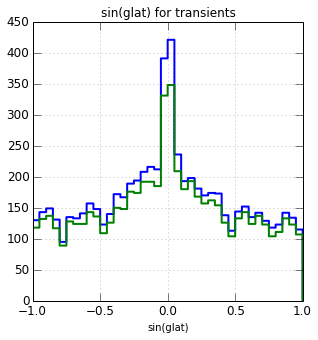

In [170]:
fig, ax = plt.subplots(figsize=(5,5))
dfall['singlat'] =np.sin(np.radians(np.asarray(dfall.glat,float)))
hist_kw=dict( histtype='step', lw=2)
ax.hist(dfall.singlat, np.linspace(-1,1,41), **hist_kw)
ax.hist(dfall.singlat[dfall.locqual<5], np.linspace(-1,1,41), **hist_kw)
ax.grid(True, alpha=0.5)
plt.setp(ax, title='sin(glat) for transients', xlabel='sin(glat)');

write out the file

In [171]:
dfall.to_csv('transients.csv')